In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

from sanfis import SANFIS
from sanfis.datagenerators import anfis_generator
from sanfis import plottingtools
import torch

In [120]:
#Чтение данных
wine = pd.read_csv('winequality-red.csv')

In [121]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [122]:
X = wine.drop(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'density', 'quality'], axis = 1)
y = wine['quality']

In [123]:
X.head()

,residual sugar,total sulfur dioxide,pH,sulphates,alcohol
0,1.9,34.0,3.51,0.56,9.4
1,2.6,67.0,3.20,0.68,9.8
2,2.3,54.0,3.26,0.65,9.8
3,1.9,60.0,3.16,0.58,9.8
4,1.9,34.0,3.51,0.56,9.4


In [124]:
X.max(axis = 0)

residual sugar           15.50
total sulfur dioxide    289.00
pH                        4.01
sulphates                 2.00
alcohol                  14.90
dtype: float64

In [125]:
X.min(axis = 0)

residual sugar          0.90
total sulfur dioxide    6.00
pH                      2.74
sulphates               0.33
alcohol                 8.40
dtype: float64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [127]:
# create model
MEMBFUNCS = [
    {'function': 'gaussian',
     'n_memb': 3,
     'params': {'mu': {'value': [4.0, 9.0, 14.0],
                       'trainable': True},
                'sigma': {'value': [1.5, 1.5, 1.5],
                          'trainable': True}}},

    {'function': 'gaussian',
     'n_memb': 3,
     'params': {'mu': {'value': [50.0, 135.0, 220],
                       'trainable': True},
                'sigma': {'value': [5.0, 5.0, 5.0],
                          'trainable': True}}},

    {'function': 'gaussian',
     'n_memb': 2,
     'params': {'mu': {'value': [2.0, 3.5],
                       'trainable': True},
                'sigma': {'value': [1.0, 1.0],
                          'trainable': True}}},

    {'function': 'gaussian',
     'n_memb': 3,
     'params': {'mu': {'value': [0.7, 1.2, 1.8],
                       'trainable': True},
                'sigma': {'value': [1.0, 1.0, 1.0],
                          'trainable': True}}},
    {'function': 'gaussian',
     'n_memb': 3,
     'params': {'mu': {'value': [9.0, 11.0, 13.0],
                       'trainable': True},
                'sigma': {'value': [1.0, 1.0, 1.0],
                          'trainable': True}}},

]
model = SANFIS(membfuncs=MEMBFUNCS,
               n_input=5
               )
optimizer = torch.optim.Adam(params=model.parameters())
loss_functions = torch.nn.MSELoss(reduction='mean')

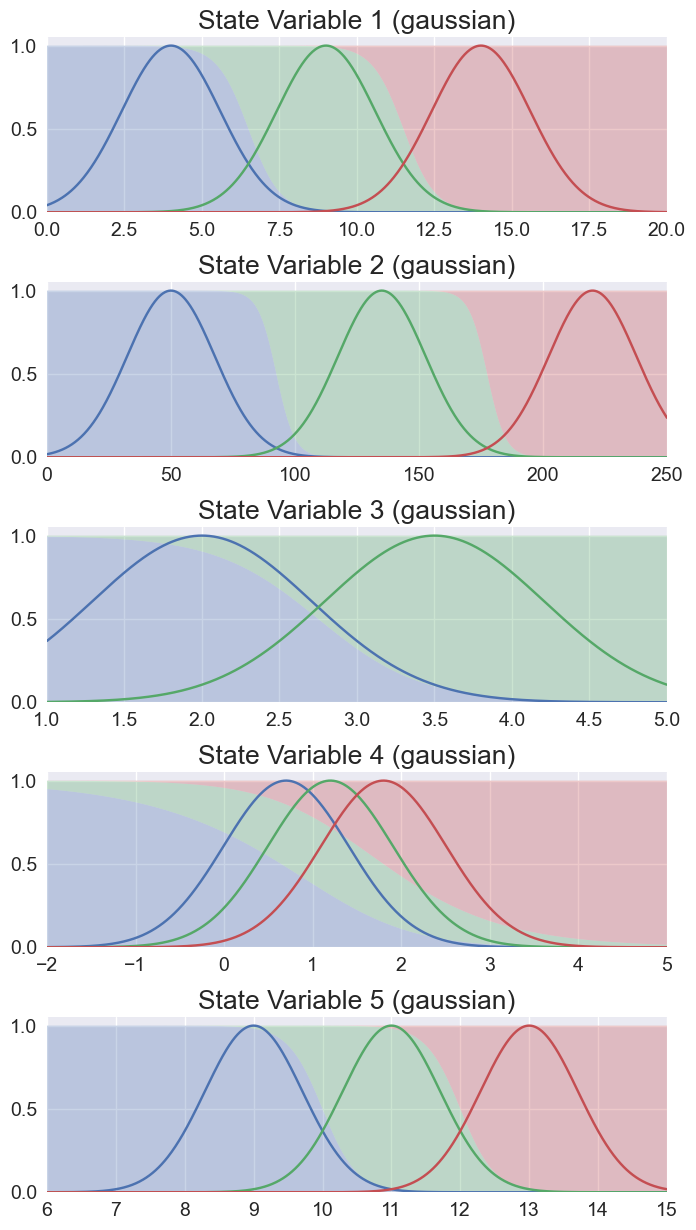

FileNotFoundError: [Errno 2] No such file or directory: 'img/prediction_mfs.pdf'

In [128]:
model.plotmfs(False, bounds=[
        [0, 20], [0, 250], [1,5], [-2,5], [6,15]], save_path='img/prediction_mfs.pdf', show_title=False)

In [142]:
X_train_d = torch.tensor(X_train.values).float()
y_train_d = torch.tensor(y_train.values).float()
X_d = torch.tensor(X.values).float()
y_d = torch.tensor(y.values).float()

Train s-anfis on 1279 samples, validate on 1599 samples


Training Loop: 100%|########################| 200.0/200 [00:27<00:00,  7.17epochs/s, train_loss=0.69, valid_loss=0.697]


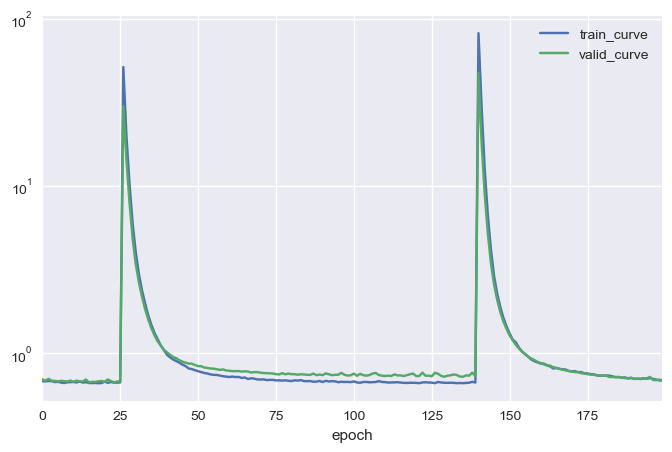

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

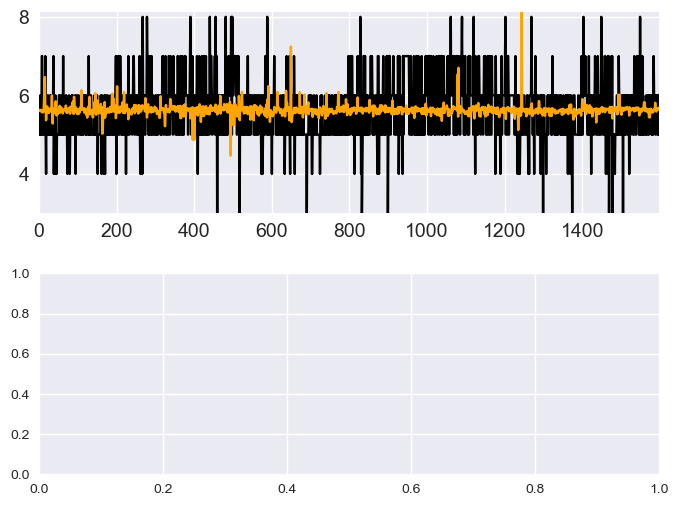

In [145]:
# fit model
history = model.fit(train_data=[X_train_d, y_train_d],
                    valid_data=[X_d, y_d],
                    optimizer=optimizer,
                    loss_function=loss_functions,
                    epochs=200,
                    )

# predict data
y_pred = model.predict(X_d)

# plot learning curves
plottingtools.plt_learningcurves(history)

# plot prediction
plottingtools.plt_prediction(y, y_pred)

In [141]:
X_train_d

tensor([[  3.0000,  81.0000,   3.4800,   0.7400,  11.6000],
        [  1.4000, 165.0000,   3.2500,   0.5900,  11.9000],
        [  1.8000,  14.0000,   3.3000,   0.7500,   9.8000],
        ...,
        [  2.7000,  85.0000,   3.5100,   0.5400,   9.5000],
        [  1.7000,  15.0000,   3.3200,   0.8000,  11.9000],
        [  1.7000,  11.0000,   3.3900,   0.5400,  13.5000]],
       dtype=torch.float64)

In [116]:
X_train.head()

,residual sugar,total sulfur dioxide,pH,sulphates,alcohol,quality
493,3.0,81.0,3.48,0.74,11.6,6
354,1.4,165.0,3.25,0.59,11.9,6
342,1.8,14.0,3.30,0.75,9.8,6
834,1.6,23.0,3.32,0.47,9.4,5
705,6.0,54.0,3.37,0.49,9.9,5


In [136]:
torch.tensor(y_train.values).float()

tensor([6., 6., 6.,  ..., 5., 7., 6.])